In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np

In [189]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

In [190]:
data.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [191]:
data.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [192]:
x=data.drop(columns=['Next_Tmax','Next_Tmin','station','Date'])
y1=data[['Next_Tmax']]
y2=data[['Next_Tmin']]

In [193]:
x

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0             28.7          21.4    58.255688    91.116364         28.074101   
1             31.9          21.6    52.263397    90.604721         29.850689   
2             31.6          23.3    48.690479    83.973587         30.091292   
3             32.0          23.4    58.239788    96.483688         29.704629   
4             31.4          21.9    56.174095    90.155128         29.113934   
...            ...           ...          ...          ...               ...   
7747          23.3          17.1    26.741310    78.869858         26.352081   
7748          23.3          17.7    24.040634    77.294975         27.010193   
7749          23.2          17.4    22.933014    77.243744         27.939516   
7750          20.0          11.3    19.794666    58.936283         17.624954   
7751          37.6          29.9    98.524734   100.000153         38.542255   

      LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  ...  \
0            23.006936   6.818887   69.451805   0.233947   0.203896  ...   
1            24.035009   5.691890   51.937448   0.225508   0.251771  ...   
2            24.565633   6.138224   20.573050   0.209344   0.257469  ...   
3            23.326177   5.650050   65.727144   0.216372   0.226002  ...   
4            23.486480   5.735004  107.965535   0.151407   0.249995  ...   
...                ...        ...         ...        ...        ...  ...   
7747         18.775678   6.148918   72.058294   0.030034   0.081035  ...   
7748         18.733519   6.542819   47.241457   0.035874   0.074962  ...   
7749         18.522965   7.289264    9.090034   0.048954   0.059869  ...   
7750         14.272646   2.882580  -13.603212   0.000000   0.000000  ...   
7751         29.619342  21.857621  213.414006   0.967277   0.968353  ...   

      LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
0      0.130928    0.000000    0.000000    0.000000    0.000000  37.6046   
1      0.127727    0.000000    0.000000    0.000000    0.000000  37.6046   
2      0.142125    0.000000    0.000000    0.000000    0.000000  37.5776   
3      0.134249    0.000000    0.000000    0.000000    0.000000  37.6450   
4      0.170021    0.000000    0.000000    0.000000    0.000000  37.5507   
...         ...         ...         ...         ...         ...      ...   
7747   0.000000    0.000000    0.000000    0.000000    0.000000  37.5372   
7748   0.000000    0.000000    0.000000    0.000000    0.000000  37.5237   
7749   0.000796    0.000000    0.000000    0.000000    0.000000  37.5237   
7750   0.000000    0.000000    0.000000    0.000000    0.000000  37.4562   
7751   0.974710   23.701544   21.621661   15.841235   16.655469  37.6450   

          lon       DEM     Slope  Solar radiation  
0     126.991  212.3350  2.785000      5992.895996  
1     127.032   44.7624  0.514100      5869.312500  
2     127.058   33.3068  0.266100      5863.555664  
3     127.022   45.7160  2.534800      5856.964844  
4     127.135   35.0380  0.505500      5859.552246  
...       ...       ...       ...              ...  
7747  126.891   15.5876  0.155400      4443.313965  
7748  126.909   17.2956  0.222300      4438.373535  
7749  126.970   19.5844  0.271300      4451.345215  
7750  126.826   12.3700  0.098475      4329.520508  
7751  127.135  212.3350  5.178230      5992.895996  

[7752 rows x 21 columns]

In [194]:
constant_feat=[i for i in x.columns if x[i].std()==0]

In [195]:
constant_feat

[]

# Removing QuasiConstant Features

In [196]:
sel=VarianceThreshold(threshold=0.01)

In [197]:
sel.fit(x)

VarianceThreshold(threshold=0.01)

In [198]:
sum(sel.get_support())

19

In [199]:
features_to_keep=x.columns[sel.get_support()]

In [200]:
x=sel.transform(x)

In [201]:
x=pd.DataFrame(x,columns=features_to_keep)

In [202]:
x.head()

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0          28.7          21.4    58.255688    91.116364         28.074101   
1          31.9          21.6    52.263397    90.604721         29.850689   
2          31.6          23.3    48.690479    83.973587         30.091292   
3          32.0          23.4    58.239788    96.483688         29.704629   
4          31.4          21.9    56.174095    90.155128         29.113934   

   LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  \
0         23.006936  6.818887   69.451805   0.233947   0.203896   0.161697   
1         24.035009  5.691890   51.937448   0.225508   0.251771   0.159444   
2         24.565633  6.138224   20.573050   0.209344   0.257469   0.204091   
3         23.326177  5.650050   65.727144   0.216372   0.226002   0.161157   
4         23.486480  5.735004  107.965535   0.151407   0.249995   0.178892   

   LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       DEM  \
0   0.130928         0.0         0.0         0.0         0.0  212.3350   
1   0.127727         0.0         0.0         0.0         0.0   44.7624   
2   0.142125         0.0         0.0         0.0         0.0   33.3068   
3   0.134249         0.0         0.0         0.0         0.0   45.7160   
4   0.170021         0.0         0.0         0.0         0.0   35.0380   

    Slope  Solar radiation  
0  2.7850      5992.895996  
1  0.5141      5869.312500  
2  0.2661      5863.555664  
3  2.5348      5856.964844  
4  0.5055      5859.552246

# Removing Corelated Features

In [203]:
def correlation(data,threshold):
    matrix=data.corr()
    col=set()
    for i in range(len(matrix.columns)):
        for j in range(i):
            if abs(matrix.iloc[i,j])>threshold:
                column=matrix.columns[i]
                col.add(column)
    return col

In [204]:
correlation(x,0.8)

set()

In [205]:
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.3,random_state=100)

# Selecting the important features

In [206]:
sel=SelectFromModel(xgb.XGBRegressor())

In [207]:
sel.fit(x_train,y_train)

SelectFromModel(estimator=XGBRegressor(base_score=None, booster=None,
                                       colsample_bylevel=None,
                                       colsample_bynode=None,
                                       colsample_bytree=None, gamma=None,
                                       gpu_id=None, importance_type='gain',
                                       interaction_constraints=None,
                                       learning_rate=None, max_delta_step=None,
                                       max_depth=None, min_child_weight=None,
                                       missing=nan, monotone_constraints=None,
                                       n_estimators=100, n_jobs=None,
                                       num_parallel_tree=None,
                                       random_state=None, reg_alpha=None,
                                       reg_lambda=None, scale_pos_weight=None,
                                       subsample=None, tree_met

In [208]:
selected_feat=list(x_train.columns[sel.get_support()])

In [209]:
selected_feat

['Present_Tmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_LH',
 'LDAPS_CC2',
 'LDAPS_CC4',
 'DEM']

In [210]:
x_train_selected=x_train[selected_feat]
x_test_selected=x_test[selected_feat]

In [211]:
x_train_selected.isnull().sum()

Present_Tmin        48
LDAPS_RHmax         57
LDAPS_Tmax_lapse    57
LDAPS_LH            57
LDAPS_CC2           57
LDAPS_CC4           57
DEM                  0
dtype: int64

In [212]:
columns_with_miss=[i for i in x_train_selected.columns if x_train_selected[i].isnull().sum()>0]

# Trying different type of Imputation of Missing Values

In [213]:
sm=SimpleImputer(strategy='mean')

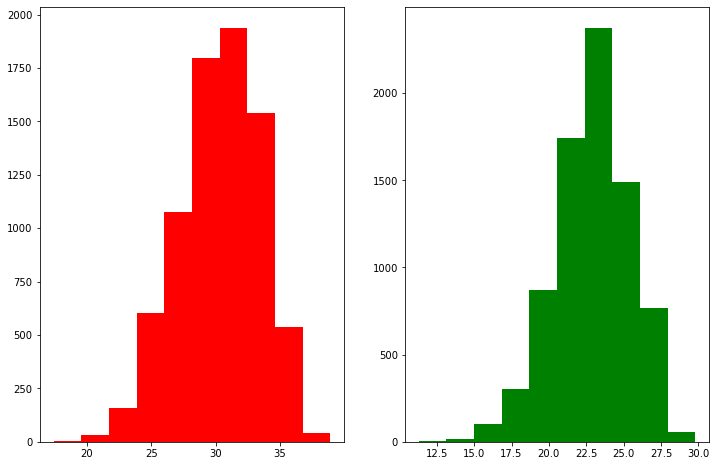

In [214]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
ax1.hist(y1.Next_Tmax,color='red')
ax2.hist(y2.Next_Tmin,color='green')
plt.show()

In [215]:
x.head()

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0          28.7          21.4    58.255688    91.116364         28.074101   
1          31.9          21.6    52.263397    90.604721         29.850689   
2          31.6          23.3    48.690479    83.973587         30.091292   
3          32.0          23.4    58.239788    96.483688         29.704629   
4          31.4          21.9    56.174095    90.155128         29.113934   

   LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  \
0         23.006936  6.818887   69.451805   0.233947   0.203896   0.161697   
1         24.035009  5.691890   51.937448   0.225508   0.251771   0.159444   
2         24.565633  6.138224   20.573050   0.209344   0.257469   0.204091   
3         23.326177  5.650050   65.727144   0.216372   0.226002   0.161157   
4         23.486480  5.735004  107.965535   0.151407   0.249995   0.178892   

   LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       DEM  \
0   0.130928         0.0         0.0         0.0         0.0  212.3350   
1   0.127727         0.0         0.0         0.0         0.0   44.7624   
2   0.142125         0.0         0.0         0.0         0.0   33.3068   
3   0.134249         0.0         0.0         0.0         0.0   45.7160   
4   0.170021         0.0         0.0         0.0         0.0   35.0380   

    Slope  Solar radiation  
0  2.7850      5992.895996  
1  0.5141      5869.312500  
2  0.2661      5863.555664  
3  2.5348      5856.964844  
4  0.5055      5859.552246

In [216]:
x_data=x[selected_feat]
y1=data[['Next_Tmax']]
y2=data[['Next_Tmin']]

# Replacing the missing values in x by mean value

In [217]:
x_data[columns_with_miss]=sm.fit_transform(x_data[columns_with_miss])

<ipython-input-217-a36ec86af7d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data[columns_with_miss]=sm.fit_transform(x_data[columns_with_miss])
C:\Users\Reshmi\anaconda3\lib\site-packages\pandas\core\frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\Reshmi\anaconda3\lib\site-packages\pandas\core\frame.py:3037: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

# Replacing the missing values in y by their median Value

In [218]:
y1.median()

Next_Tmax    30.5
dtype: float64

In [219]:
y2.median()

Next_Tmin    23.1
dtype: float64

In [220]:
y1.fillna(30.5,inplace=True)

C:\Users\Reshmi\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [221]:
y2.fillna(23.1,inplace=True)

# For Max Tempreture Prediction

In [222]:
x_train_selected,x_test_selected,y_train,y_test=train_test_split(x_data,y1,test_size=0.3,random_state=100)

# Scaling the features

In [223]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [224]:
def Prediction(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    error=np.sqrt(mean_squared_error(y_pred,y_test))
    score=r2_score(y_pred,y_test)
    return error,score

In [225]:
x_data.isnull().sum()

Present_Tmin        0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_LH            0
LDAPS_CC2           0
LDAPS_CC4           0
DEM                 0
dtype: int64

In [226]:
linear_error,linear_score=Prediction(LinearRegression(),x_train_selected,x_test_selected,y_train,y_test)

In [227]:
linear_score

0.6098194630986294

In [228]:
rf_error,rf_score=Prediction(RandomForestRegressor(),x_train_selected,x_test_selected,y_train,y_test)

<ipython-input-224-47f31d7817de>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


In [229]:
rf_score

0.7702289020457751

In [230]:
gb_error,gb_score=Prediction(GradientBoostingRegressor(),x_train_selected,x_test_selected,y_train,y_test)

C:\Users\Reshmi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [231]:
gb_score

0.7006110087047759

In [232]:
ada_error,ada_score=Prediction(AdaBoostRegressor(),x_train_selected,x_test_selected,y_train,y_test)

C:\Users\Reshmi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [233]:
ada_score

0.3853092391408792

In [234]:
xg_error,xg_score=Prediction(xgb.XGBRegressor(),x_train_selected,x_test_selected,y_train,y_test)

In [235]:
xg_score

0.7845973425124817

In [236]:
result=pd.DataFrame({'Models':['LinearRegression','RandomForestRegressor','GradientBoostingRegressor','AdaBoostRegressor','XgbRegressor'],
                    'Error':[linear_error,rf_error,gb_error,ada_error,xg_error],
                    'R2_score':[linear_score,rf_score,gb_score,ada_score,xg_score]})

# Final Result for Max Tempreture

In [237]:
result

Models     Error  R2_score
0           LinearRegression  1.651356  0.609819
1      RandomForestRegressor  1.326464  0.770229
2  GradientBoostingRegressor  1.459568  0.700611
3          AdaBoostRegressor  1.730710  0.385309
4               XgbRegressor  1.319992  0.784597

# For Min Tempreture

In [238]:
x_data=x[selected_feat]

In [239]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y2,test_size=0.3,random_state=100)

In [240]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [241]:
linear_error,linear_score=Prediction(LinearRegression(),x_train_selected,x_test_selected,y_train,y_test)
rf_error,rf_score=Prediction(RandomForestRegressor(),x_train_selected,x_test_selected,y_train,y_test)
gb_error,gb_score=Prediction(GradientBoostingRegressor(),x_train_selected,x_test_selected,y_train,y_test)
ada_error,ada_score=Prediction(AdaBoostRegressor(),x_train_selected,x_test_selected,y_train,y_test)
xg_error,xg_score=Prediction(xgb.XGBRegressor(),x_train_selected,x_test_selected,y_train,y_test)

<ipython-input-224-47f31d7817de>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)
C:\Users\Reshmi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Reshmi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [242]:
result=pd.DataFrame({'Models':['LinearRegression','RandomForestRegressor','GradientBoostingRegressor','AdaBoostRegressor','XgbRegressor'],
                    'Error':[linear_error,rf_error,gb_error,ada_error,xg_error],
                    'R2_score':[linear_score,rf_score,gb_score,ada_score,xg_score]})

In [243]:
result

Models     Error  R2_score
0           LinearRegression  1.312274  0.612810
1      RandomForestRegressor  1.079729  0.755013
2  GradientBoostingRegressor  1.181364  0.696718
3          AdaBoostRegressor  1.375703  0.509901
4               XgbRegressor  1.076046  0.768884